# KNN  (K-NEAREST NEIGHBOUR)

Steps
1. Choose no of k (dafualt value for k = 5)
2. consider using Euclidean distance/ Manhatten distance
3. count no of data points in each category
4. Assign the new data point where counted most neighbour

In [1]:
pwd

'C:\\Users\\User\\Git-Hup Files\\Machine Learning Classification'

In [2]:
cd C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing

C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing


In [3]:
#Import all the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import Data set from the local directory
df = pd.read_csv("EmailClassification.csv")

In [5]:
df.head(10)

,Email_ID,Month,Email_Sent,Open_Rate,Click_Rate,Conversion_Rate
0,EMA00081000168000,Jan,873,42,14,0
1,EMA00081000187610,Feb,630,32,26,1
2,EMA00081000244770,Mar,988,21,8,0
3,EMA00081000245260,Apr,339,25,9,0
4,EMA00081000264690,May,1157,30,31,1
5,EMA00081000337110,Jun,1157,25,31,1
6,EMA00081000390580,Jul,962,78,27,0
7,EMA00081000445960,Jan,578,17,11,0
8,EMA00081000581770,Feb,1173,33,21,1
9,EMA00081000587870,Mar,1173,23,2,0


In [6]:
#defining X and Y
x = df.iloc[:,2:-1]
y= df.iloc[:, -1]

In [7]:
x.head(10)

,Email_Sent,Open_Rate,Click_Rate
0,873,42,14
1,630,32,26
2,988,21,8
3,339,25,9
4,1157,30,31
5,1157,25,31
6,962,78,27
7,578,17,11
8,1173,33,21
9,1173,23,2


In [8]:
y.head(10)

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Conversion_Rate, dtype: int64

In [9]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x , y, test_size=0.2, random_state=0)

In [10]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#metric = 'minkowski' : Eucleadian Distance
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)

In [12]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<b>n_neighborsint, default=5</b> : Number of neighbors to use by default for kneighbors queries. <br/>

<b>weights{‘uniform')default=’uniform’ </b> : uniform’ : uniform weights. All points in each neighborhood are weighted equally.<br/>

<b>algorithm : auto</b>Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

In [13]:
#Prediction
y_pred = classifier.predict(x_test)

In [14]:
# No of correct and incorrect prdection
from sklearn.metrics import confusion_matrix, accuracy_score

[[27  3]
 [ 3  7]]


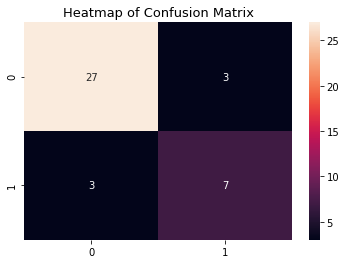

In [15]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Heatmap of Confusion Matrix', fontsize=13)
sns.heatmap(cm, annot=True)
plt.show()

In [16]:
#Prediction and Evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.70      0.70      0.70        10

    accuracy                           0.85        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.85      0.85      0.85        40



In [17]:
#Accuracy
accuracy_score(y_test, y_pred) 

0.85

In [18]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("accuracies: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

accuracies: 74.83 %
Standard Deviation: 12.51 %
